# Tabulate tracking task data & kinematics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from datetime import date

import aopy
import aopy.data.bmi3d as bmi3d
import aopy.data.db as db
plt.rcParams['font.size'] = '16'

/home/aolab/miniconda3/envs/katherine-analysis/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/aolab/miniconda3/envs/katherine-analysis/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/home/aolab/miniconda3/envs/katherine-analysis/lib/python3.9/site-packages/one/alf/files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(


In [2]:
preproc_dir = '/data/preprocessed/'
db.BMI3D_DBNAME = 'booth' # for in-cage data, use 'tablet'

# load task codes
task_codes = aopy.data.bmi3d.load_bmi3d_task_codes()

# set constants
samplerate = 120

## Tabulate (newer) experiment data

Newer tracking task data contains unique event codes and event times for the start and end of ramp periods. 

**This does not effect the usability of the tabulated dataframe (all columns will be present), simply the behind-the-scenes way the dataframe columns are filled in.**

In [3]:
# set subject and range of dates to look up
subject = 'churro'
task_date = (date.fromisoformat('2025-03-03'), date.fromisoformat('2025-03-13'))

# look up sessions (aka entries) of subject within date range
entries = db.lookup_sessions(subject=subject, date=task_date, task_desc='tracking task')
display(entries)

# sort entries into lists of important metadata
subjects, te_ids, te_dates = db.list_entry_details(entries)

[2025-03-03 16:06:16.137089: churro on tracking task, id=19367,
 2025-03-04 16:29:38.509324: churro on tracking task, id=19381,
 2025-03-05 14:59:10.425884: churro on tracking task, id=19390,
 2025-03-05 15:23:08.784877: churro on tracking task, id=19392,
 2025-03-05 15:34:52.672716: churro on tracking task, id=19394,
 2025-03-06 14:21:12.534646: churro on tracking task, id=19401,
 2025-03-06 14:40:30.642826: churro on tracking task, id=19402,
 2025-03-06 15:19:44.195229: churro on tracking task, id=19403,
 2025-03-11 14:46:48.316095: churro on tracking task, id=19423,
 2025-03-11 15:12:35.944435: churro on tracking task, id=19424,
 2025-03-11 15:41:40.775817: churro on tracking task, id=19425]

In [4]:
# tabulate data across entries into a df where rows = trials
metadata = [
    'features', 'scale', 'rotation', 'exp_rotation', 'offset',
    'trajectory_amplitude', 'disturbance_amplitude', 'cursor_radius', 'target_radius',
    'tracking_out_time'  
]
df = bmi3d.tabulate_behavior_data_tracking_task(preproc_dir, subjects, te_ids, te_dates, metadata)
df.head()

  0%|          | 0/11 [00:00<?, ?it/s]

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,tracking_start_time,trajectory_start_time,trajectory_end_time,tracking_end_time,reward_start_time,penalty_start_time,penalty_event,pause_start_time,pause_event,trial_end_time
0,churro,19367,2025-03-03,"[16, 2, 64, 239]","[6.02204, 6.457, 6.60116, 7.93624]",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,zyx,...,NaN,NaN,NaN,NaN,NaN,6.60116,64.0,NaN,NaN,7.93624
1,churro,19367,2025-03-03,"[16, 2, 81, 97, 81, 97, 81, 80, 96, 80, 96, 80...","[8.11332, 8.52728, 8.93504, 9.3966, 9.72716, 9...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,zyx,...,8.93504,10.48168,30.83520,32.36324,32.36324,NaN,NaN,NaN,NaN,33.00908
2,churro,19367,2025-03-03,"[16, 2, 64, 239]","[33.17244, 33.29592, 33.31952, 34.65868]",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,zyx,...,NaN,NaN,NaN,NaN,NaN,33.31952,64.0,NaN,NaN,34.65868
3,churro,19367,2025-03-03,"[16, 2, 81, 97, 81, 97, 96, 80, 96, 80, 96, 80...","[34.83156, 35.18776, 35.5954, 36.00936, 36.585...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,zyx,...,35.59540,37.09492,57.57612,59.13304,59.13304,NaN,NaN,NaN,NaN,59.75772
4,churro,19367,2025-03-03,"[16, 2, 81, 97, 81, 97, 81, 97, 81, 80, 96, 80...","[59.93952, 59.9478, 60.35448, 60.7454, 61.0116...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,zyx,...,60.35448,61.91224,82.83836,84.39132,84.39132,NaN,NaN,NaN,NaN,85.03296


## Tabulate (older) experiment data

Older tracking task data does not contain unique ramp events; the start and end of ramp periods are estimated using the sequence generator params.

**This does not effect the usability of the tabulated dataframe (all columns will be present), simply the behind-the-scenes way the dataframe columns are filled in.**

In [5]:
# set subject and range of dates to look up
subject = 'beignet'
task_date = (date.fromisoformat('2023-06-13'), date.fromisoformat('2023-06-24'))

# look up sessions (aka entries) of subject within date range
entries = db.lookup_sessions(subject=subject, date=task_date, task_desc='tracking task')
display(entries)

# sort entries into lists of important metadata
subjects, te_ids, te_dates = db.list_entry_details(entries)

[2023-06-13 14:29:37.570000: beignet on tracking task, id=9701,
 2023-06-13 14:49:06.959000: beignet on tracking task, id=9702,
 2023-06-13 14:55:33.866000: beignet on tracking task, id=9703,
 2023-06-14 13:39:04.384000: beignet on tracking task, id=9717,
 2023-06-14 13:50:40.366000: beignet on tracking task, id=9718,
 2023-06-14 13:53:52.918000: beignet on tracking task, id=9719,
 2023-06-15 13:08:24.838000: beignet on tracking task, id=9723,
 2023-06-15 13:19:57.469000: beignet on tracking task, id=9724,
 2023-06-15 13:31:18.419000: beignet on tracking task, id=9725,
 2023-06-16 13:53:07.923000: beignet on tracking task, id=9728,
 2023-06-16 14:05:50.244000: beignet on tracking task, id=9729,
 2023-06-16 14:08:57.072000: beignet on tracking task, id=9730,
 2023-06-17 13:40:35.067000: beignet on tracking task, id=9734,
 2023-06-17 13:52:16.907000: beignet on tracking task, id=9735,
 2023-06-17 13:55:26.072000: beignet on tracking task, id=9736,
 2023-06-18 13:34:55.077000: beignet on 

In [7]:
# tabulate data across entries into a df where rows = trials
metadata = [
    'features', 'scale', 'rotation', 'exp_rotation', 'offset',
    'trajectory_amplitude', 'disturbance_amplitude', 'cursor_radius', 'target_radius',
    'tracking_out_time'  
]
df = bmi3d.tabulate_behavior_data_tracking_task(preproc_dir, subjects, te_ids, te_dates, metadata)
df.head()

  0%|          | 0/33 [00:00<?, ?it/s]

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,tracking_start_time,trajectory_start_time,trajectory_end_time,tracking_end_time,reward_start_time,penalty_start_time,penalty_event,pause_start_time,pause_event,trial_end_time
0,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[6.79096, 7.24928, 7.45828, 11.7332, 12.1748, ...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,7.45828,8.95828,28.97444,30.47444,30.47444,NaN,NaN,NaN,NaN,31.39560
1,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[33.091, 33.09912, 33.30768, 40.55796, 41.2824...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,33.30768,34.80768,54.84080,56.34080,56.34080,NaN,NaN,NaN,NaN,57.26276
2,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[58.95804, 59.224, 59.433, 60.63292, 61.01628,...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,59.43300,60.93300,80.98240,82.48240,82.48240,NaN,NaN,NaN,NaN,83.40760
3,beignet,9701,2023-06-13,"[16, 2, 64, 239]","[85.09884, 85.44052, 85.62388, 86.94212]",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,NaN,NaN,NaN,NaN,85.62388,64.0,NaN,NaN,86.94212
4,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[88.64056, 89.09056, 89.29948, 91.6656, 91.916...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,89.29948,90.79948,110.85728,112.35728,112.35728,NaN,NaN,NaN,NaN,113.28256


In [8]:
# add additional metadata related to visuomotor perturbations (note: non-perturbation sessions will have NaN values for these params)
param_names = ['pertubation_rotation', 'init_rotation_y', 'final_rotation_y', 'delta_rotation_y', 'trials_per_increment']
param_funcs = [lambda x: x.get_task_param(name) for name in param_names]

db.add_metadata_columns(df, entries, param_names, param_funcs)
df.head()

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,penalty_start_time,penalty_event,pause_start_time,pause_event,trial_end_time,pertubation_rotation,init_rotation_y,final_rotation_y,delta_rotation_y,trials_per_increment
0,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[6.79096, 7.24928, 7.45828, 11.7332, 12.1748, ...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,NaN,NaN,NaN,31.39560,6.0,6.0,6.0,6.0,6.0
1,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[33.091, 33.09912, 33.30768, 40.55796, 41.2824...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,NaN,NaN,NaN,57.26276,6.0,6.0,6.0,6.0,6.0
2,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[58.95804, 59.224, 59.433, 60.63292, 61.01628,...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,NaN,NaN,NaN,83.40760,6.0,6.0,6.0,6.0,6.0
3,beignet,9701,2023-06-13,"[16, 2, 64, 239]","[85.09884, 85.44052, 85.62388, 86.94212]",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,85.62388,64.0,NaN,NaN,86.94212,6.0,6.0,6.0,6.0,6.0
4,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[88.64056, 89.09056, 89.29948, 91.6656, 91.916...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,NaN,NaN,NaN,113.28256,6.0,6.0,6.0,6.0,6.0


In [9]:
# add even more metadata by extracting info from the 'sequence_params' column
df['sequence_params'] = [json.loads(df.iloc[i]['sequence_params']) for i in range(len(df))] # convert 'sequence_params' from string to dict so it's easier to use

time_length = [df.sequence_params[i]['time_length'] for i in range(len(df))]
ramp = [df.sequence_params[i]['ramp'] for i in range(len(df))]
ramp_down = [df.sequence_params[i]['ramp_down'] for i in range(len(df))]

df['time_length'] = time_length
df['ramp'] = ramp
df['ramp_down'] = ramp_down
df.head()

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,pause_event,trial_end_time,pertubation_rotation,init_rotation_y,final_rotation_y,delta_rotation_y,trials_per_increment,time_length,ramp,ramp_down
0,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[6.79096, 7.24928, 7.45828, 11.7332, 12.1748, ...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,31.39560,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
1,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[33.091, 33.09912, 33.30768, 40.55796, 41.2824...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,57.26276,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
2,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[58.95804, 59.224, 59.433, 60.63292, 61.01628,...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,83.40760,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
3,beignet,9701,2023-06-13,"[16, 2, 64, 239]","[85.09884, 85.44052, 85.62388, 86.94212]",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,86.94212,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
4,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[88.64056, 89.09056, 89.29948, 91.6656, 91.916...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,113.28256,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5


## Filter tabulated data

In [10]:
# make new df containing only rewarded trials
reward_df = df[df['reward']==True]
reward_df.head()

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,pause_event,trial_end_time,pertubation_rotation,init_rotation_y,final_rotation_y,delta_rotation_y,trials_per_increment,time_length,ramp,ramp_down
0,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[6.79096, 7.24928, 7.45828, 11.7332, 12.1748, ...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,31.39560,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
1,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[33.091, 33.09912, 33.30768, 40.55796, 41.2824...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,57.26276,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
2,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[58.95804, 59.224, 59.433, 60.63292, 61.01628,...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,83.40760,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
4,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[88.64056, 89.09056, 89.29948, 91.6656, 91.916...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,113.28256,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
5,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[114.97368, 114.98204, 115.19068, 116.4076, 11...",True,False,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,139.13532,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5


In [11]:
# make new df containing only trials that ended in a tracking out penalty
tracking_out_df = df[df.penalty_event == task_codes['OTHER_PENALTY']]
tracking_out_df.head()

,subject,te_id,date,event_codes,event_times,reward,penalty,features,scale,rotation,...,pause_event,trial_end_time,pertubation_rotation,init_rotation_y,final_rotation_y,delta_rotation_y,trials_per_increment,time_length,ramp,ramp_down
10,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[199.44816, 199.73984, 199.94872, 200.18216, 2...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,207.64756,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
15,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[313.88392, 314.15588, 314.36472, 315.73988, 3...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,334.70596,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
17,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[339.66408, 339.88904, 340.09812, 341.16664, 3...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,358.44252,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
21,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 80, 96, 80, 96, 80, 96...","[393.9138, 393.98052, 394.1894, 394.56444, 394...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,404.47412,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5
22,beignet,9701,2023-06-13,"[16, 2, 80, 96, 80, 96, 79, 239]","[406.14708, 409.5304, 409.73932, 411.52264, 41...",False,True,"[b'optitrack', b'reward_system', b'saveHDF', b...",1.0,yzx,...,NaN,416.54836,6.0,6.0,6.0,6.0,6.0,20,1.5,1.5


## Get reward trial kinematics using tabulated data

In [12]:
# specify columns from the df to use for segmenting kinematics
start_event = 'trajectory_start_time'
end_event = 'trajectory_end_time'

# get cursor & target kinematics for rewarded trials
cursor_segments_reward = bmi3d.tabulate_kinematic_data(
    preproc_dir, reward_df['subject'], reward_df['te_id'], reward_df['date'], 
    reward_df[start_event], reward_df[end_event], 
    datatype='cursor', samplerate=samplerate, upsamplerate=samplerate
)

target_segments_reward = bmi3d.tabulate_kinematic_data(
    preproc_dir, reward_df['subject'], reward_df['te_id'], reward_df['date'], 
    reward_df[start_event], reward_df[end_event], 
    datatype='reference', samplerate=samplerate, upsamplerate=samplerate
)

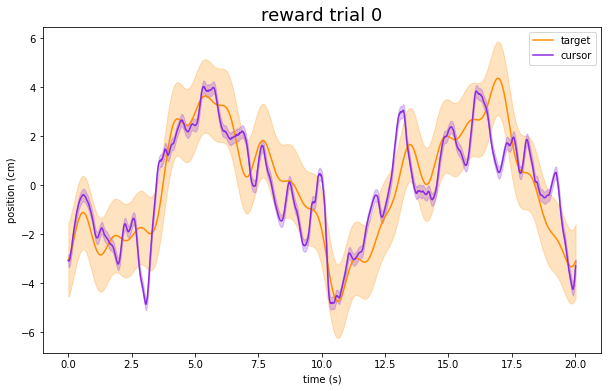

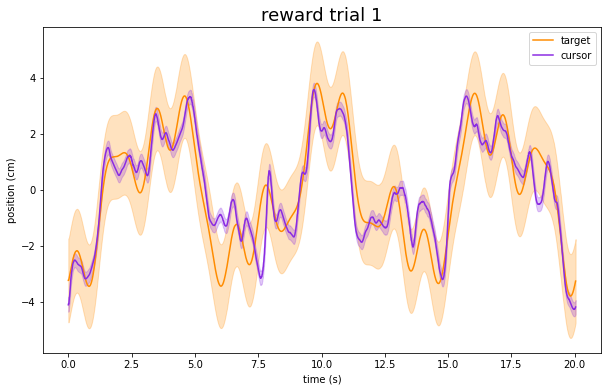

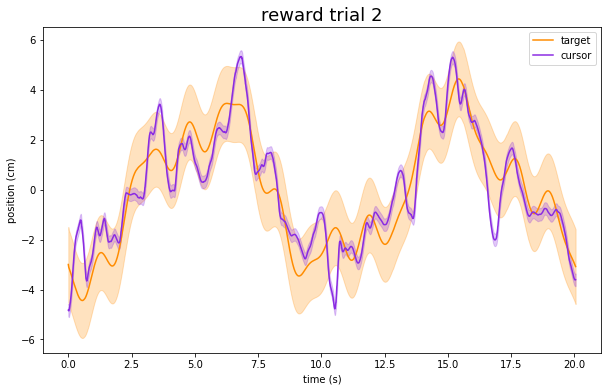

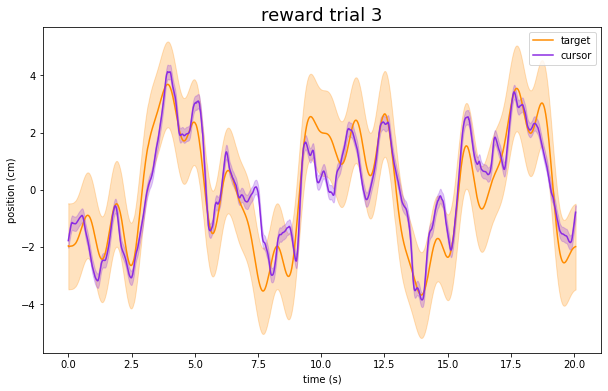

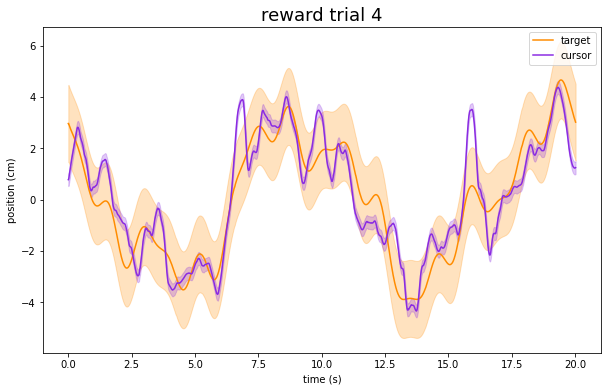

In [13]:
# plot kinematics for an example rewarded trial
y_idx = 1 # tracking task signals are 1D, so only have non-zero y-values

for trial_idx in range(5):
    plt.figure(figsize=(10,6))
    plt.title(f'reward trial {trial_idx}', fontsize=18)
    t = np.linspace(0, target_segments_reward[trial_idx].shape[0]/samplerate, target_segments_reward[trial_idx].shape[0])
    plt.plot(t, target_segments_reward[trial_idx][:,y_idx], color='darkorange', label='target')
    plt.plot(t, cursor_segments_reward[trial_idx][:,y_idx], color='blueviolet', label='cursor')
    plt.fill_between(t, target_segments_reward[trial_idx][:,y_idx] - reward_df.target_radius.values[trial_idx], 
                        target_segments_reward[trial_idx][:,y_idx] + reward_df.target_radius.values[trial_idx], color='darkorange', alpha=.25)
    plt.fill_between(t, cursor_segments_reward[trial_idx][:,y_idx] - reward_df.cursor_radius.values[trial_idx], 
                        cursor_segments_reward[trial_idx][:,y_idx] + reward_df.cursor_radius.values[trial_idx], color='blueviolet', alpha=.25)
    plt.xlabel('time (s)')
    plt.ylabel('position (cm)')
    plt.legend(loc='upper right');

## Get penalty trial kinematics using tabulated data

In [14]:
# specify columns from the df to use for segmenting kinematics
start_event = 'trajectory_start_time'
end_event = 'trajectory_end_time' # equivalent to using 'penalty_start_time'

# get cursor & target kinematics for trials that ended in a tracking out penalty
cursor_segments_trackout = bmi3d.tabulate_kinematic_data(
    preproc_dir, tracking_out_df['subject'], tracking_out_df['te_id'], tracking_out_df['date'], 
    tracking_out_df[start_event], tracking_out_df[end_event], 
    datatype='cursor', samplerate=samplerate, upsamplerate=samplerate
)

target_segments_trackout = bmi3d.tabulate_kinematic_data(
    preproc_dir, tracking_out_df['subject'], tracking_out_df['te_id'], tracking_out_df['date'], 
    tracking_out_df[start_event], tracking_out_df[end_event], 
    datatype='reference', samplerate=samplerate, upsamplerate=samplerate
)

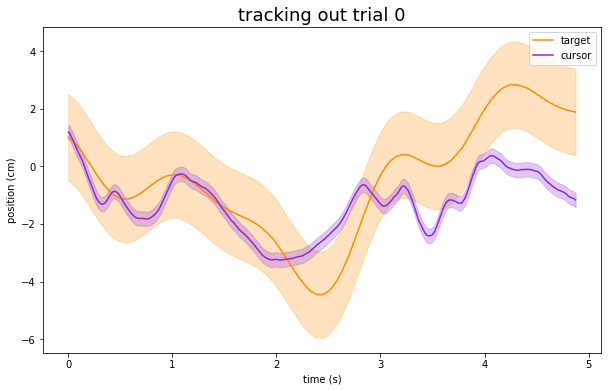

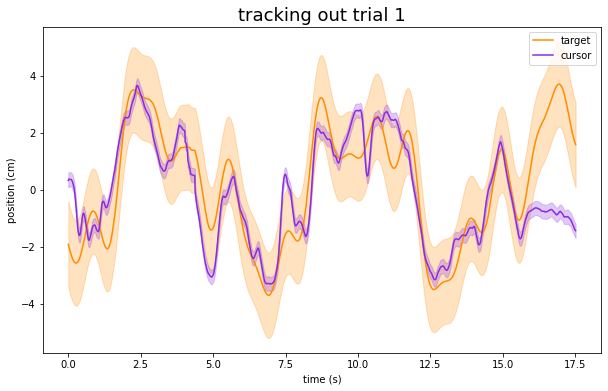

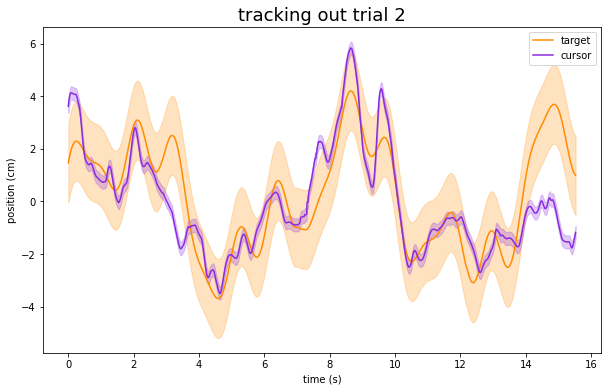

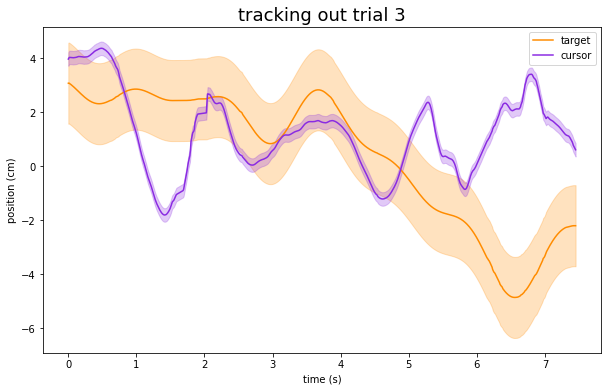

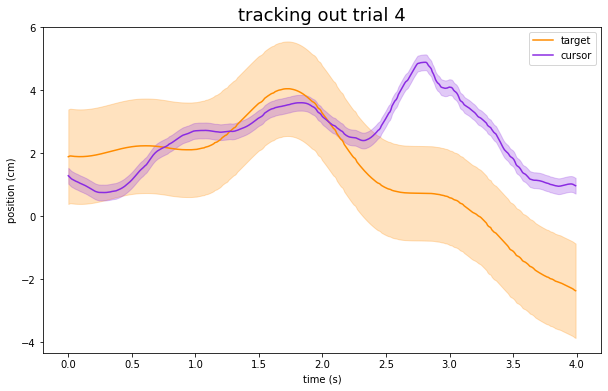

In [15]:
# plot kinematics for an example penalty trial
y_idx = 1 # tracking task signals are 1D, so only have non-zero y-values

for trial_idx in range(5):
    plt.figure(figsize=(10,6))
    plt.title(f'tracking out trial {trial_idx}', fontsize=18)
    t = np.linspace(0, target_segments_trackout[trial_idx].shape[0]/samplerate, target_segments_trackout[trial_idx].shape[0])
    plt.plot(t, target_segments_trackout[trial_idx][:,y_idx], color='darkorange', label='target')
    plt.plot(t, cursor_segments_trackout[trial_idx][:,y_idx], color='blueviolet', label='cursor')
    plt.fill_between(t, target_segments_trackout[trial_idx][:,y_idx] - tracking_out_df.target_radius.values[trial_idx], 
                        target_segments_trackout[trial_idx][:,y_idx] + tracking_out_df.target_radius.values[trial_idx], color='darkorange', alpha=.25)
    plt.fill_between(t, cursor_segments_trackout[trial_idx][:,y_idx] - tracking_out_df.cursor_radius.values[trial_idx], 
                        cursor_segments_trackout[trial_idx][:,y_idx] + tracking_out_df.cursor_radius.values[trial_idx], color='blueviolet', alpha=.25)
    plt.xlabel('time (s)')
    plt.ylabel('position (cm)')
    plt.legend(loc='upper right');

## Get inter-trial kinematics using tabulated data

In [16]:
# specify columns from the df to use for segmenting kinematics
start_event = 'prev_trial_end_time'
end_event = 'target_on_time'

# get cursor & target kinematics between tracking out penalty and start of next trial
cursor_segments_intertrial = bmi3d.tabulate_kinematic_data(
    preproc_dir, tracking_out_df['subject'], tracking_out_df['te_id'], tracking_out_df['date'], 
    tracking_out_df[start_event], tracking_out_df[end_event], 
    datatype='cursor', samplerate=samplerate, upsamplerate=samplerate
)

target_segments_intertrial = bmi3d.tabulate_kinematic_data(
    preproc_dir, tracking_out_df['subject'], tracking_out_df['te_id'], tracking_out_df['date'], 
    tracking_out_df[start_event], tracking_out_df[end_event], 
    datatype='reference', samplerate=samplerate, upsamplerate=samplerate
)

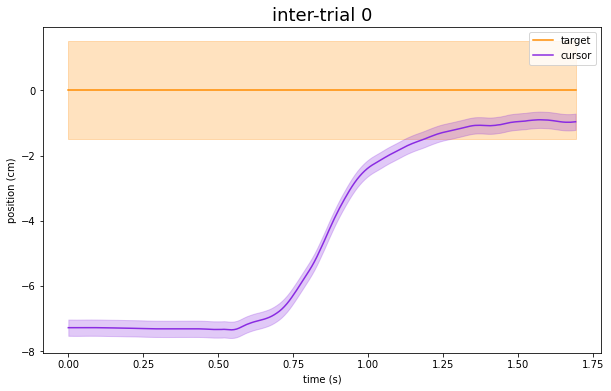

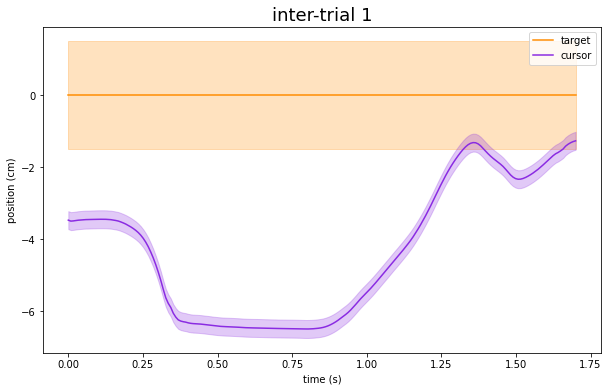

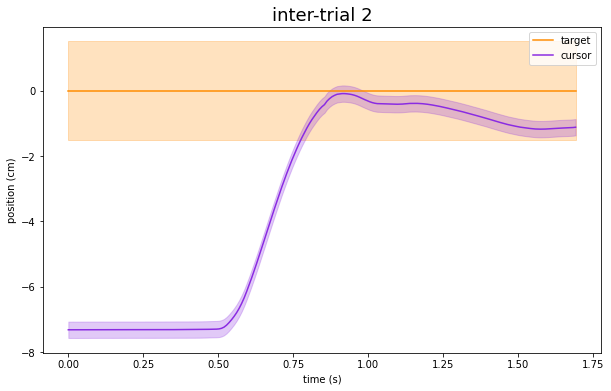

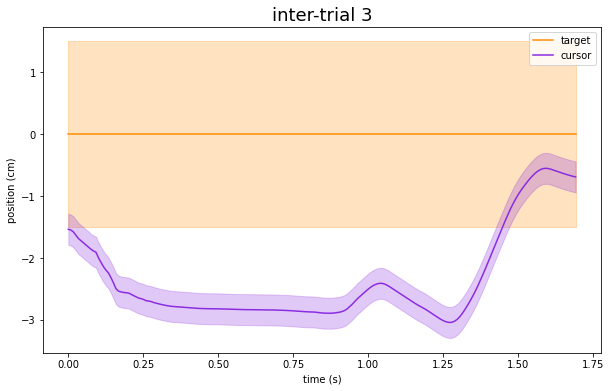

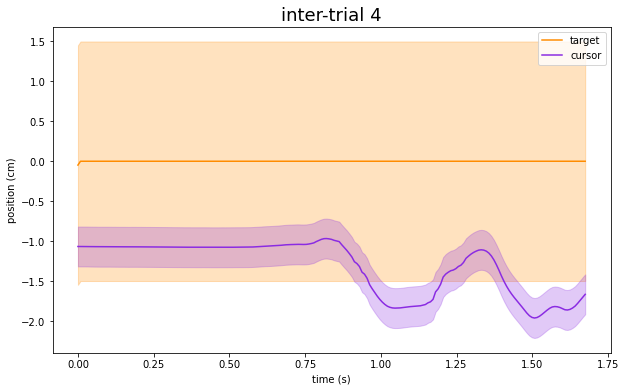

In [17]:
# plot kinematics for an example inter-trial interval
y_idx = 1 # tracking task signals are 1D, so only have non-zero y-values

for trial_idx in range(5):
    plt.figure(figsize=(10,6))
    plt.title(f'inter-trial {trial_idx}', fontsize=18)
    t = np.linspace(0, target_segments_intertrial[trial_idx].shape[0]/samplerate, target_segments_intertrial[trial_idx].shape[0])
    plt.plot(t, target_segments_intertrial[trial_idx][:,y_idx], color='darkorange', label='target')
    plt.plot(t, cursor_segments_intertrial[trial_idx][:,y_idx], color='blueviolet', label='cursor')
    plt.fill_between(t, target_segments_intertrial[trial_idx][:,y_idx] - reward_df.target_radius.values[trial_idx], 
                        target_segments_intertrial[trial_idx][:,y_idx] + reward_df.target_radius.values[trial_idx], color='darkorange', alpha=.25)
    plt.fill_between(t, cursor_segments_intertrial[trial_idx][:,y_idx] - reward_df.cursor_radius.values[trial_idx], 
                        cursor_segments_intertrial[trial_idx][:,y_idx] + reward_df.cursor_radius.values[trial_idx], color='blueviolet', alpha=.25)
    plt.xlabel('time (s)')
    plt.ylabel('position (cm)')
    plt.legend(loc='upper right');